In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
file_path = '/content/sample_data'

Load in file as datasets

In [0]:
game_sales_2017 = pd.read_csv(file_path + '/Video_Game_Sales_as_of_Jan_2017.csv')
game_sales_2016 = pd.read_csv(file_path + '/Video_Games_Sales_as_at_22_Dec_2016.csv')

join two datasets and remove any duplicate rows

In [0]:
merged_data = pd.concat([game_sales_2017, game_sales_2016])
merged_data = merged_data.drop_duplicates(keep=False)
merged_data = merged_data[(merged_data['Year_of_Release'] > 1995) & (merged_data['Year_of_Release'] < 2016)]

# Research Question 1: What is the game trend in recent years? 

What genre is the most selling, and what genre has the highest rating? 


In [0]:
global_sales = merged_data[['Genre', 'Year_of_Release', 'Global_Sales']]
user_ratings = merged_data[['Genre', 'Year_of_Release', 'User_Score']]
sum_global_sales = global_sales.groupby(['Genre', 'Year_of_Release']).sum()
ave_user_ratings = user_ratings.groupby(['Genre', 'Year_of_Release']).mean()

**Plot line graphs**

Global Sales

In [0]:
ave_global_sales = sum_global_sales.groupby(['Genre']).mean()
most_selling_genre = ave_global_sales[ave_global_sales.Global_Sales == ave_global_sales.Global_Sales.max()]
print(most_selling_genre)

        Global_Sales
Genre               
Action       141.528


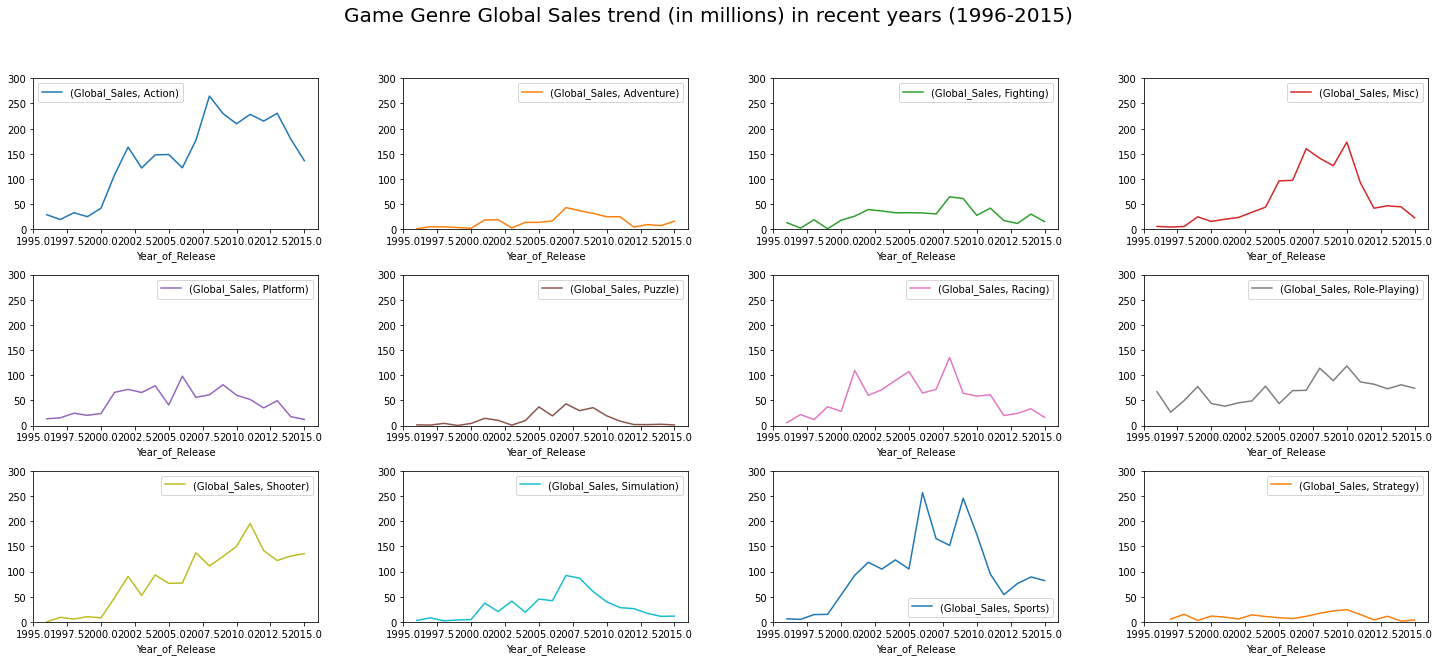

In [0]:
# 'Game Genre Global Sales trend in recent years (1996-2015)'
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))
sum_global_sales.unstack('Genre').plot(subplots=True, ax=ax, xlim=[1995,2016], ylim=[0,300])
plt.suptitle('Game Genre Global Sales trend (in millions) in recent years (1996-2015)', fontsize=20)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig(file_path + '/global_sales.png', bbox_inches='tight')

User Ratings

In [0]:
user_ratings = ave_user_ratings.groupby(['Genre']).mean()
highest_rating_genre = user_ratings[user_ratings.User_Score == user_ratings.User_Score.max()]
print(highest_rating_genre)

              User_Score
Genre                   
Role-Playing     7.83984


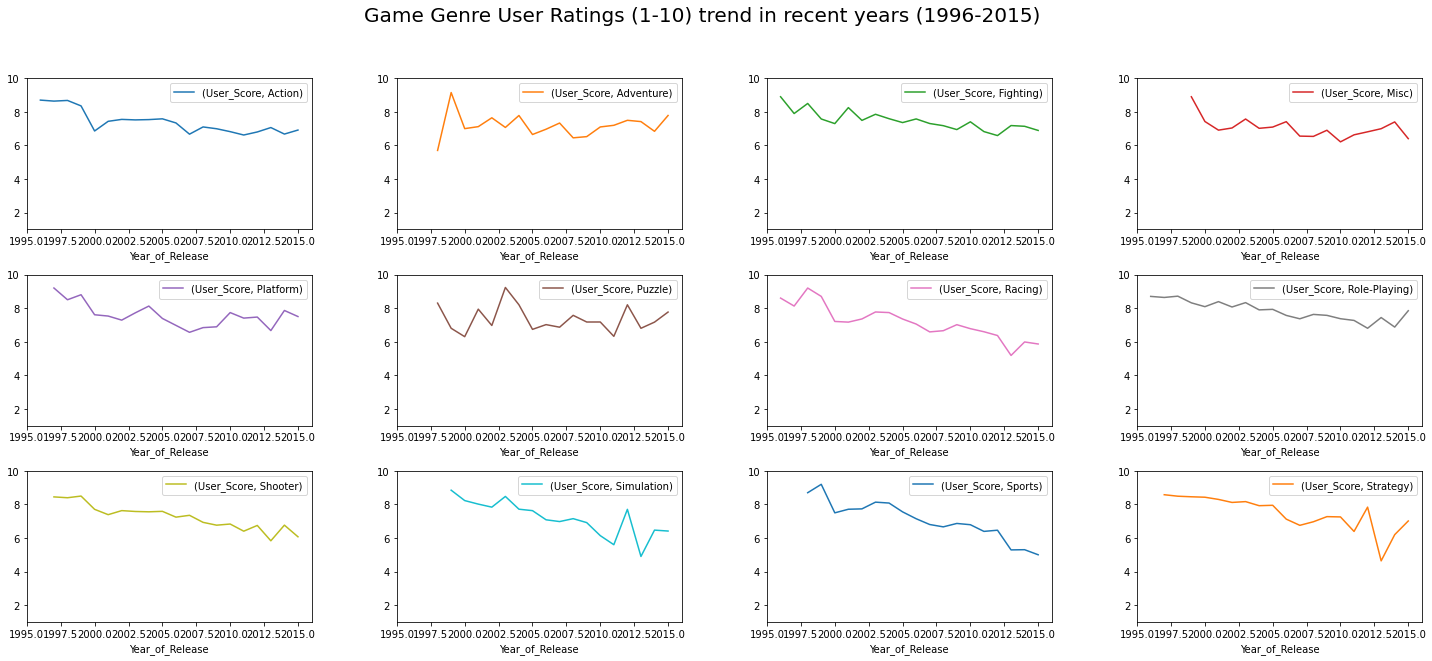

In [0]:
# 'Game Genre User Ratings trend in recent years (1996-2015)'
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))
ave_user_ratings.unstack('Genre').plot(subplots=True, ax=ax, xlim=[1995,2016], ylim=[1,10])
plt.suptitle('Game Genre User Ratings (1-10) trend in recent years (1996-2015)', fontsize=20)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig(file_path + '/user_rating.png', bbox_inches='tight')

# Reseach Question 2: What game genre will be most trending in the future? 

Global Sales

In [0]:
gs_sum = sum_global_sales.unstack(['Genre'])
gs_series_value = gs_sum.values
gs_genre = list(gs_sum.columns.get_level_values('Genre'))
gs_genre[7] = 'Role_playing'

gs_value = pd.DataFrame(gs_series_value)
gs_series = pd.concat([gs_value, gs_value.shift(1)], axis=1)
gs_series.columns = gs_genre + [w+'_forecast' for w in gs_genre]
gs_series.index = range(1996, 2016)
gs_series = gs_series[1:20]

train = gs_series[0:14]
test = gs_series[15:19]

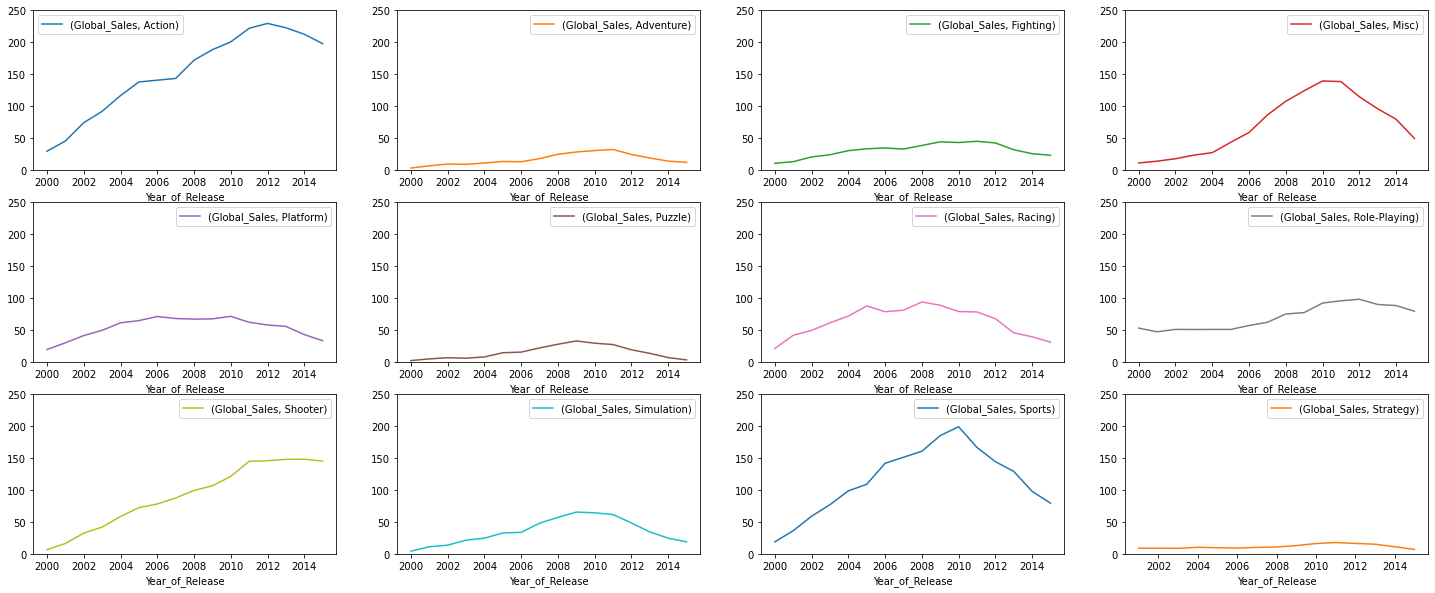

In [0]:
gs_mean = gs_sum.rolling(window=5).mean()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))
gs_mean.plot(subplots=True, ax=ax, ylim=[0,250])
plt.savefig(file_path + '/gs_mean.png', bbox_inches='tight')

In [0]:
from sklearn.metrics import mean_squared_error
import numpy as np

# ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # help to choose the order of ARIMA
from statsmodels.tsa.arima_model import ARIMA

In [0]:
action_model = ARIMA(train.Action, order=(0,0,1))
action_model_fit = action_model.fit()
action_forecast = action_model_fit.forecast(steps = 4)[0]
action_mse = np.sqrt(mean_squared_error(test.Action_forecast, action_forecast))
if action_mse < gs_series.Action.describe()['std']: 
  action_forecast = action_model_fit.forecast(steps = 9)[0]
  action_predict_sales = action_forecast[4:9].mean()
action_predict_sales

128.6872687960421

In [0]:
shooter_model = ARIMA(train.Shooter, order=(2,2,1))
shooter_model_fit = shooter_model.fit()
shooter_forecast = shooter_model_fit.forecast(steps = 4)[0]
shooter_mse = np.sqrt(mean_squared_error(test.Shooter_forecast, shooter_forecast))
if shooter_mse < gs_series.Shooter.describe()['std']: 
  shooter_forecast = shooter_model_fit.forecast(steps = 9)[0]
  shooter_predict_sales = shooter_forecast[4:9].mean()
shooter_predict_sales

211.71122783744812

In [0]:
ur_sum = ave_user_ratings.unstack(['Genre'])
ur_series_value = ur_sum.values
ur_genre = list(gs_sum.columns.get_level_values('Genre'))
ur_genre[7] = 'Role_playing'

User Ratings

In [0]:
ur_value = pd.DataFrame(ur_series_value)
ur_series = pd.concat([ur_value, ur_value.shift(1)], axis=1)
ur_series.columns = ur_genre + [w+'_forecast' for w in ur_genre]
ur_series.index = range(1996, 2016)
ur_series = ur_series[1:20]

train_ur = ur_series[0:14]
test_ur = ur_series[15:19]

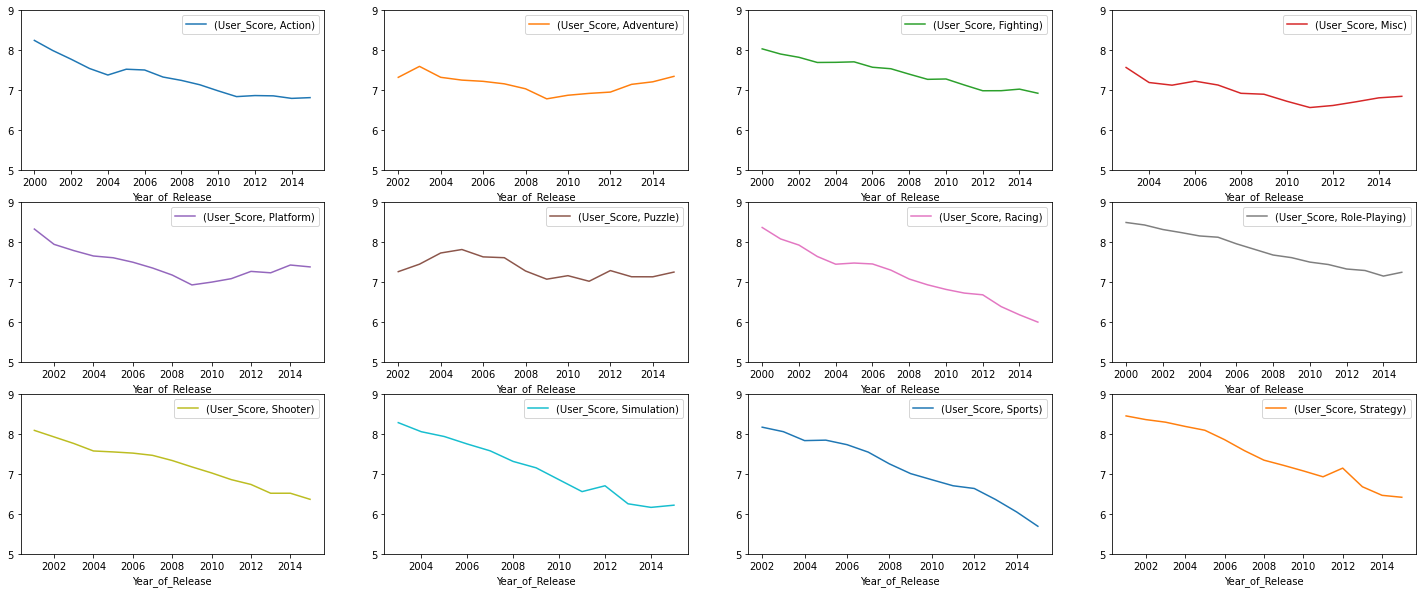

In [0]:
ur_mean = ur_sum.rolling(window=5).mean()
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(25,10))
ur_mean.plot(subplots=True, ax=ax, ylim=[5,9])
plt.savefig(file_path + '/ur_mean.png', bbox_inches='tight')

In [0]:
# Adventure, Misc, Puzzle, Role_playing
train_ur_adv = train_ur.Adventure[1:19]
train_ur_misc = train_ur.Misc[2:19]
train_ur_puzzle = train_ur.Puzzle[1:19]

In [0]:
adv_model = ARIMA(train_ur_adv, order=(1,0,0))
adv_model_fit = adv_model.fit()
adv_forecast = adv_model_fit.forecast(steps = 4)[0]
adv_mse = np.sqrt(mean_squared_error(test_ur.Adventure_forecast, adv_forecast))
if adv_mse < ur_series.Adventure.describe()['std']: 
  adv_forecast = adv_model_fit.forecast(steps = 9)[0]
  adv_predict_ratings = adv_forecast[4:9].mean()
adv_predict_ratings

7.15312973236172

In [0]:
misc_model = ARIMA(train_ur_misc, order=(0,0,1))
misc_model_fit = misc_model.fit()
misc_forecast = misc_model_fit.forecast(steps = 4)[0]
misc_mse = np.sqrt(mean_squared_error(test_ur.Misc_forecast, misc_forecast))
if misc_mse < ur_series.Adventure.describe()['std']: 
  misc_forecast = misc_model_fit.forecast(steps = 9)[0]
  misc_predict_ratings = misc_forecast[4:9].mean()
misc_predict_ratings

7.1730673775523055

In [0]:
puzzle_model = ARIMA(train_ur_puzzle, order=(2,1,0))
puzzle_model_fit = puzzle_model.fit()
puzzle_forecast = puzzle_model_fit.forecast(steps = 4)[0]
puzzle_mse = np.sqrt(mean_squared_error(test_ur.Puzzle_forecast, puzzle_forecast))
if puzzle_mse < ur_series.Puzzle.describe()['std']: 
  puzzle_forecast = puzzle_model_fit.forecast(steps = 9)[0]
  puzzle_predict_ratings = puzzle_forecast[4:9].mean()
puzzle_predict_ratings

6.990716373522737

In [0]:
rpg_model = ARIMA(train_ur.Role_playing, order=(0,1,1))
rpg_model_fit = rpg_model.fit()
rpg_forecast = rpg_model_fit.forecast(steps = 4)[0]
rpg_mse = np.sqrt(mean_squared_error(test_ur.Role_playing_forecast, rpg_forecast))
if rpg_mse < ur_series.Role_playing.describe()['std']: 
  rpg_forecast = rpg_model_fit.forecast(steps = 9)[0]
  rpg_predict_ratings = rpg_forecast[4:9].mean()
rpg_predict_ratings

6.644964825537424

# Research Question 3: 

# Research Question 4:
